In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# carga de librerías y dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/TP - IA/snic-provincias.csv')

#Las preguntas para el análisis más o menos son:

#¿Qué cantidad de registros hay? ¿Qué tipos de datos?
#¿Qué cantidad de valores nulos hay?
#¿Hay columnas descartables o prescindibles?
#¿Cuál es la correlación entre las columnas?
#¿Qué datos son discretos y cuáles contínuos?
#¿Hay variables categóricas mal escritas?
#¿Hay outliers?


In [ ]:
#De esta línea deducimos que son 8880 registros, de 7 columnas

print(df.shape)

In [8]:
#Y de esta podemos observar los tipos de datos de esas 7 columnas. Podemos observar 4 numéricos y 3 categóricos. Podemos observar que delito_snic_id y
#delito_snic_nombre hacen referencia a la misma columna. Al igual que provincia_id y provincia_nombre

print(df.dtypes)

anio                           int64
provincia_id                   int64
provincia_nombre              object
codigo_delito_snic_id         object
codigo_delito_snic_nombre     object
cantidad_hechos                int64
cantidad_victimas            float64
dtype: object


In [ ]:
#Analizamos el head y el tail del dataset. Con la información recavada hasta el momento, nos damos cuenta de que podemos rectificar 
#el tipo de dato de algunas columnas. Por ejemplo, no tiene sentido que cantidad_victimas sea float, o que codigo_delito_snic_id sea 
#del tipo categórico cuando solo alberga un número.

print(df.head())
print(df.tail())

In [ ]:
#Buscamos valores nulos. Observamos que la mayoría de las columnas no contienen valores nulos, excepto cantidad_víctimas.

print(df.info())

In [ ]:
#Hacemos un análisis estadístico general del dataset, de las variables numéricas
print(df.describe(include=[np.number]))

#Y de las variables categóricas:
print(df.describe(include=['O']))

In [ ]:
#Graficamos la cantidad de hechos delictivos totales por año. Para eso agrupamos por año, y de esta agrupación sumamos entre sí la cantidad
#de cada uno de los distintos tipos de hechos delictivos de cada año.

cantPorAño = df.groupby('anio')['cantidad_hechos'].sum()
sns.histplot(data=cantPorAño, x=cantPorAño.index, weights=cantPorAño.values, bins=8)
plt.xlabel('Año')
plt.ylabel('Cantidad de hechos')

In [ ]:
#No encontramos forma de realizar un análisis de alguna distribución de las variables categóricas (por ejemplo, cantidad de veces que aparece cada
#tipo de hecho delictivo) porque las variables categóricas del dataset apuntan a una suma de hechos delictivos previamente establecida. El gráfico
#siguiente no representa la frecuencia real de cada tipo de delito, sino su aparición en el dataset.

sns.countplot(data=df,x='codigo_delito_snic_nombre')

In [ ]:
#Hacemos un gráfico de dispersión por puntos, de la cantidad de totales de hechos distribuidos por provincias. Podemos observar que en Capital Federal
#hay un valor excesivamente diferente a los demás, que podría ser considerado un outlier.

cantPorProv = df.groupby('provincia_id')['cantidad_hechos'].sum()
sns.scatterplot(x=cantPorProv.index, y=cantPorProv.values, data=cantPorProv)


In [ ]:
#Hacemos un análisis de correlación entre las columnas numéricas. Como podemos observar rápidamente en el mapa de calor, la correlación entre todas las 
#columnas es bastante baja, a excepción de cantidad víctimas y cantidad hechos, que tienen una correlación muy alta, cercana a 1.

#Podemos deducir que al tener una correlación demasiado baja, pero negativa, el aumentar el anio la cantidad de hechos debería disminuir muy gradualmente.

print(df.corr())
sns.heatmap(df.corr())

In [ ]:
#Mostramos la cantidad de hechos según cada categoría. Habría que buscar la mejor forma de graficar esto con mathplotlib.

cantPorTipoDelito = df.groupby('codigo_delito_snic_nombre')['cantidad_hechos'].sum()
print(cantPorTipoDelito)


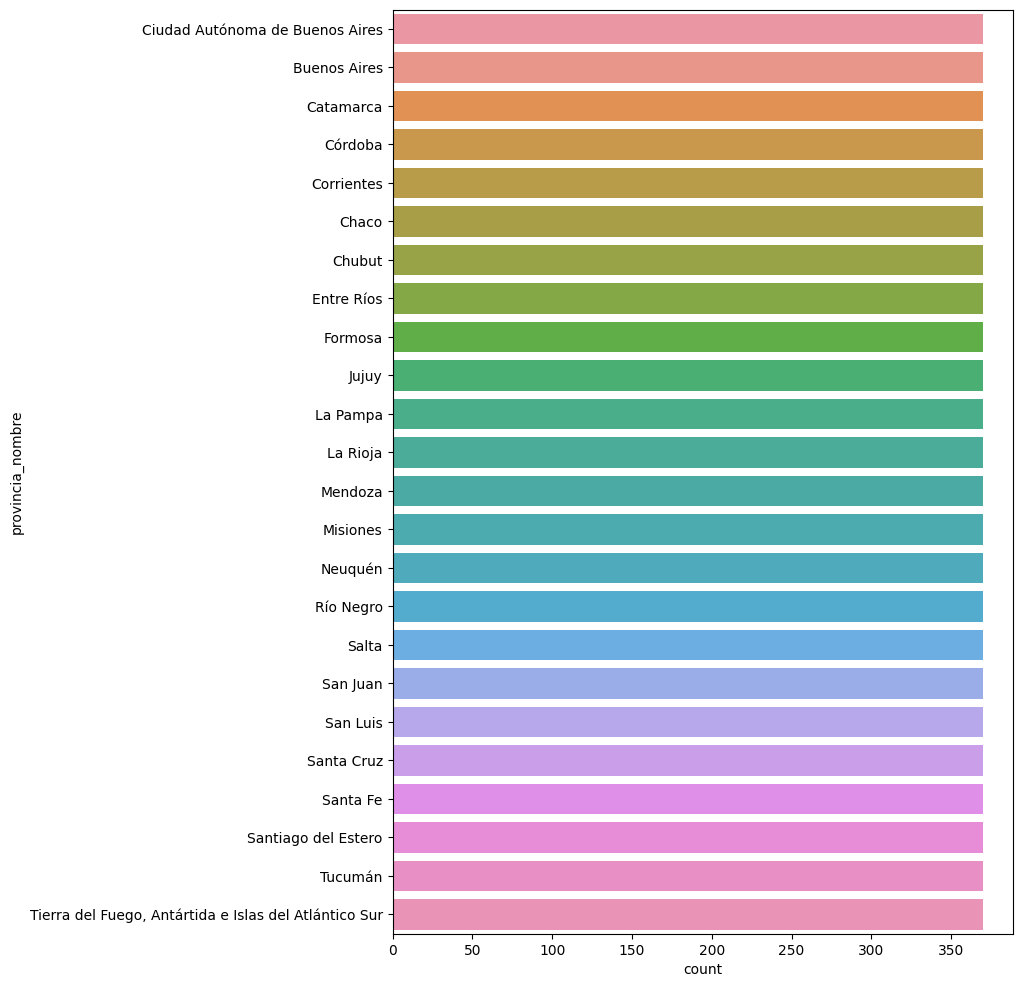

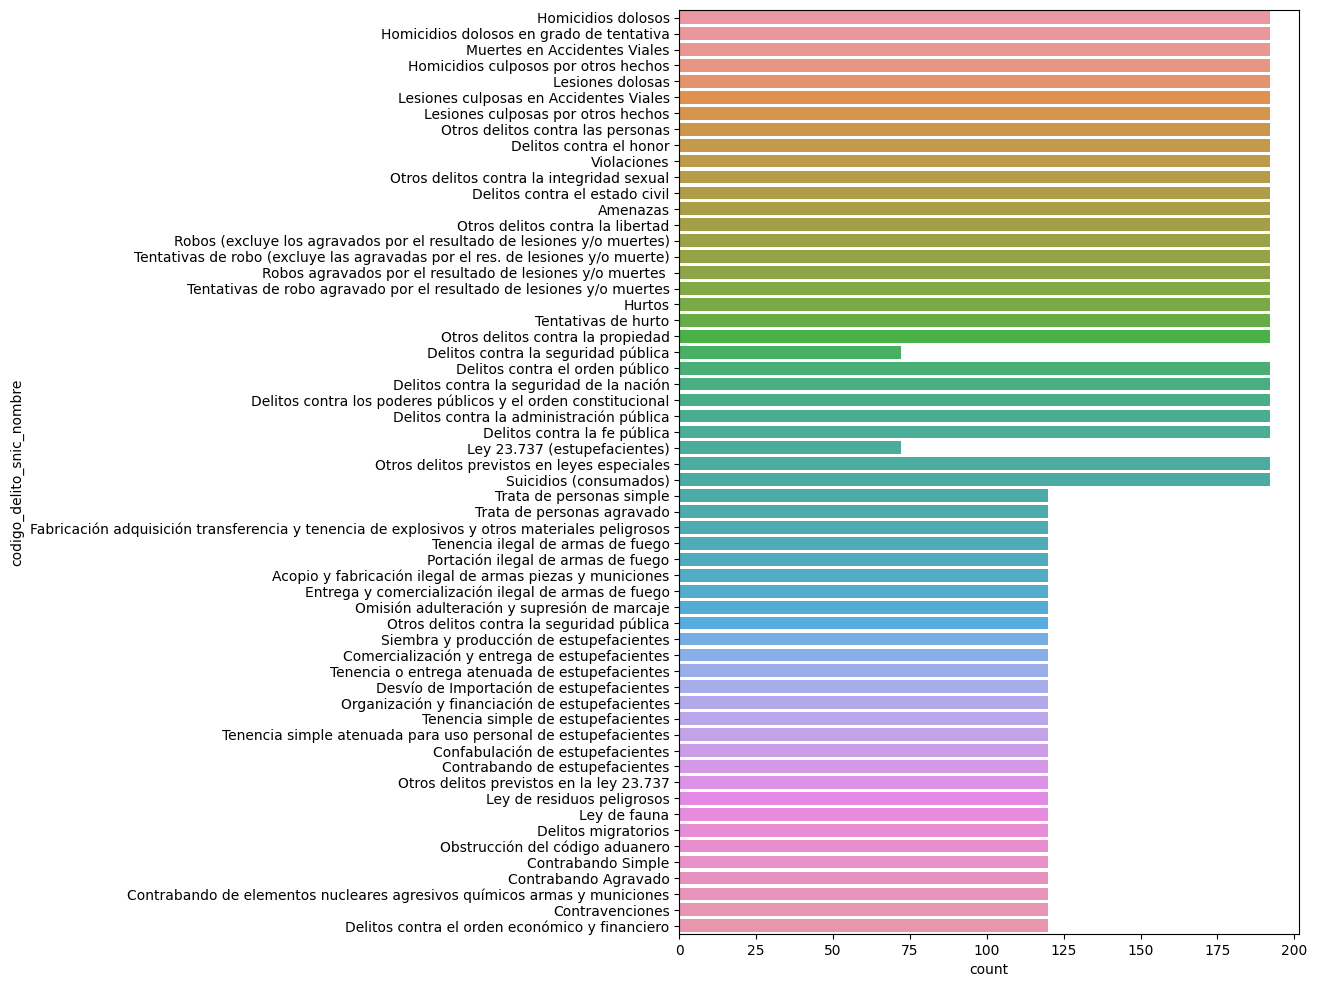

In [24]:
#Graficamos las ocurrencias de cada variable categórica. Acá no importa el conteo, sino ver que no haya errores de escritura en las variables
#categóricas.

#Hago una lista de las columnas categóricas
cols_cat = ['provincia_nombre','codigo_delito_snic_nombre']

#Y recorro con un for. Innecesario por 2 columnas, pero nos puede servir para otro dataset.
for col in cols_cat:
#Determino el tamaño del countplot
  plt.figure(figsize=(8,12))
  col_graf = sns.countplot(data=df, y=col)
  plt.show()
